In [1]:
import pandas as pd
import numpy as np
from pandas import Timestamp
import empyrical

In [2]:
from lumina.empyrical.gentic.pyplot_drawer import plot_his_profit

In [3]:
task_id = '200037'

In [4]:
time_periods = {
    'train_time': (Timestamp('2022-07-25 09:31:00'), Timestamp('2024-05-29 13:22:00')),
    'val_time': (Timestamp('2024-05-29 13:23:00'), Timestamp('2024-12-05 10:15:00')),
    'test_time': (Timestamp('2024-12-05 10:16:00'), Timestamp('2025-03-13 15:00:00'))
}

In [5]:
def create_returns(names, task_id, mode='a_ret', key=None):
    res1 = []
    for name in names:
        if isinstance(key, str):
            temp = "temp/aicso2/{0}/returns/{1}/{2}.feather".format(
                str(task_id), key, name)
        else:
            temp = "temp/aicso2/{0}/returns/{1}.feather".format(
                str(task_id), name)
        cumulative_returns = pd.read_feather(temp).set_index(
            'trade_time')[mode]
        cumulative_returns.name = key + "_" + name
        res1.append(cumulative_returns)
    return pd.concat(res1, axis=1)


In [6]:
tst5_returns = create_returns(names=['equal_weight','train_fitness_weight',
        'equal_weight_kmeans_discrete','train_fitness_weight_kmeans_discrete'], task_id=task_id, key='tst5')
tst5_returns.head()

,tst5_equal_weight,tst5_train_fitness_weight,tst5_equal_weight_kmeans_discrete,tst5_train_fitness_weight_kmeans_discrete
trade_time,,,,
2022-07-25,-0.001363,-0.001630,-0.006733,-0.007182
2022-07-26,0.000888,0.000310,0.002758,-0.002618
2022-07-27,0.000815,-0.000054,-0.001468,-0.003823
2022-07-28,-0.001349,-0.000938,-0.000019,0.000728
2022-07-29,-0.003745,-0.004586,-0.004498,-0.006360


In [7]:
tst51_returns = create_returns(names=['equal_weight_gmm_hard',
'train_fitness_weight_gmm_hard'], task_id=task_id, key='tst5')
tst51_returns.head()

,tst5_equal_weight_gmm_hard,tst5_train_fitness_weight_gmm_hard
trade_time,,
2022-07-25,0.000456,-0.007182
2022-07-26,0.007927,-0.002618
2022-07-27,0.008273,-0.003823
2022-07-28,-0.006713,0.000728
2022-07-29,-0.007898,-0.006360


In [12]:
cumulative_returns = pd.concat([tst5_returns],axis=1)
cumulative_returns.head()

,tst5_equal_weight,tst5_train_fitness_weight,tst5_equal_weight_kmeans_discrete,tst5_train_fitness_weight_kmeans_discrete
trade_time,,,,
2022-07-25,-0.001363,-0.001630,-0.006733,-0.007182
2022-07-26,0.000888,0.000310,0.002758,-0.002618
2022-07-27,0.000815,-0.000054,-0.001468,-0.003823
2022-07-28,-0.001349,-0.000938,-0.000019,0.000728
2022-07-29,-0.003745,-0.004586,-0.004498,-0.006360


In [13]:
def create_empyrical(cumulative_returns, types=['all','train','val','test']):
    res = []
    for column in cumulative_returns.columns:
        dt = {'name': column}
        for tp in types:
            if tp == 'all':
                all_fitness = empyrical.sharpe_ratio(returns=cumulative_returns[column],
                                                  period=empyrical.DAILY)
                dt['all_sharpe'] = all_fitness
            if tp == 'train':
                train_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['train_time'][0]:time_periods['train_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['train_sharpe'] = train_fitness
            if tp == 'val':
                val_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['val_time'][0]:time_periods['val_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['val_sharpe'] = val_fitness
            if tp == 'test':
                test_fitness = empyrical.sharpe_ratio(returns=cumulative_returns.loc[time_periods['test_time'][0]:time_periods['test_time'][1]][column],
                                               period=empyrical.DAILY)
                dt['test_sharpe'] = test_fitness
        res.append(dt)
    return pd.DataFrame(res)

In [14]:
from lumina.empyrical.gentic.pyplot_drawer import plot_his_profit

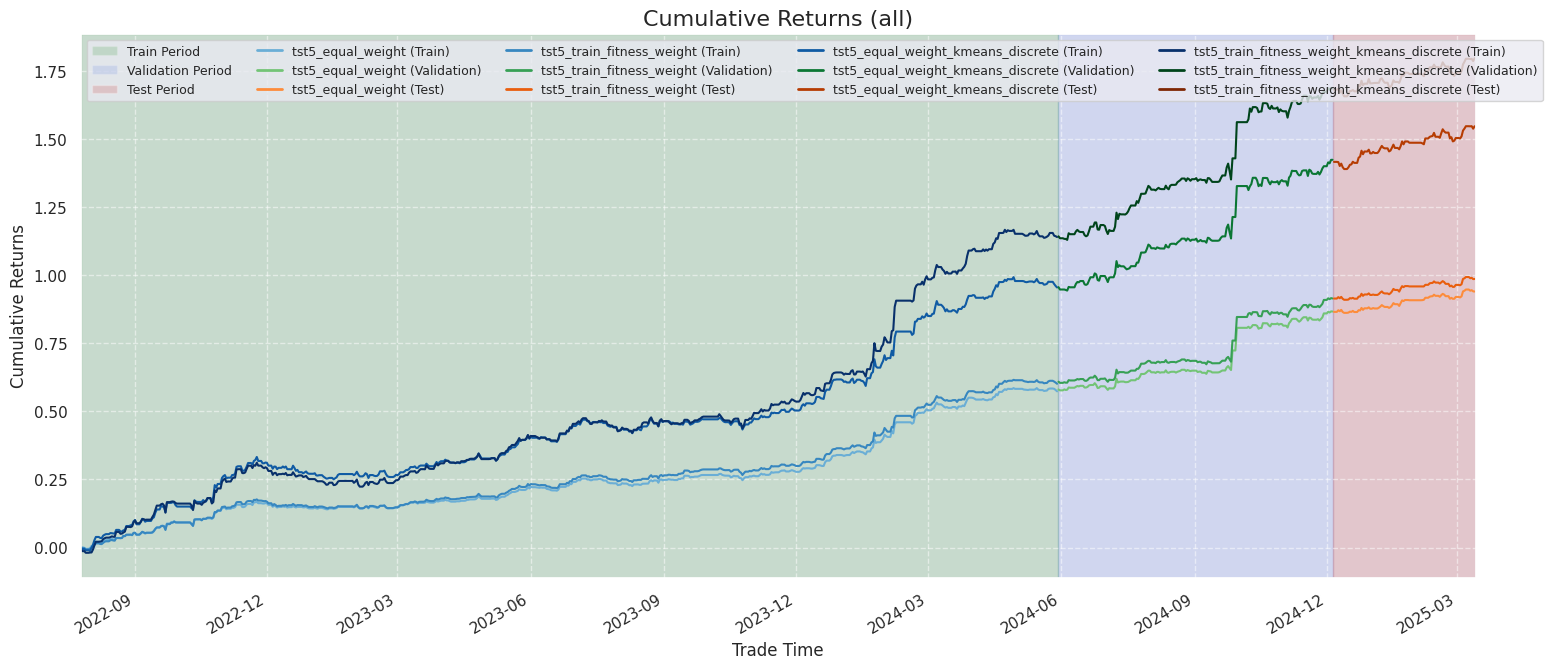

,name,train_sharpe,val_sharpe,test_sharpe
0,tst5_equal_weight,3.299189,2.639192,2.839784
1,tst5_train_fitness_weight,3.318432,2.667269,2.697469
2,tst5_equal_weight_kmeans_discrete,2.921943,2.854740,2.420864
3,tst5_train_fitness_weight_kmeans_discrete,3.099597,3.000750,2.076153


In [15]:
columns = cumulative_returns.columns

plot_his_profit(cumulative_returns=cumulative_returns.cumsum(),
                    time_periods=time_periods,
                    name='all')
res = create_empyrical(cumulative_returns=cumulative_returns,
                           types=['train', 'val', 'test'])
res

,name,train_sharpe,val_sharpe,test_sharpe
0,tst5_equal_weight,3.299189,2.639192,2.839784
1,tst5_train_fitness_weight,3.318432,2.667269,2.697469
2,tst5_equal_weight_kmeans_discrete,2.921943,2.854740,2.420864
3,tst5_train_fitness_weight_kmeans_discrete,3.099597,3.000750,2.076153
4,tst5_equal_weight_gmm_hard,3.037867,2.002616,1.898381
5,tst5_train_fitness_weight_gmm_hard,3.119895,3.022813,1.939433
